# Getting Started with Kaggle: Housing Price Competition

https://www.dataquest.io/blog/kaggle-getting-started/

## Step 1: Aquire the data and create our environment

In [1]:
# import statements
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use(style="ggplot")
plt.rcParams['figure.figsize'] = (10,6)
%matplotlib inline

In [2]:
# read in csv files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# let's check the size of the data
print("Train data shape: ", train.shape)
print("Test data shape: ", test.shape)

Train data shape:  (1460, 81)
Test data shape:  (1459, 80)


We see that ```test``` has only 80 columns, while train has 81. This is due to the fact that the test data do not include the final sale price information

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Here's a brief version of what you'll find in the data description file:
* **```SalePrice```**: the property's sale price in dollars. This is the target variable that you're trying to predict
* **```MSSubClass```**: the building class
* **```MSZoning```**: the general zoning classification
* **```LotFrontage```**: linear feet of street connected to property
* **```LotArea```**: lot size in square feet
* **```Street```**: type of road access
* **```Alley```**: type of alley access
* **```LotShape```**: general shape of property
* **```LandContour```**: flatness of the property
* **```Utilities```**: type of utilities available
* **```LotConfig```**: lot configuration

# Step 2: explore the data and engineer features

In [5]:
# target variable
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The average sale price of a house in our dataset is close to \$180k, with most of the values falling within the \$130k to \$215k range

Skew is: 1.88287575977


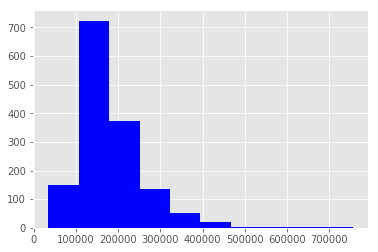

In [6]:
# check for skewness

print("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color = "blue")
plt.show()

Note that the distribution has a longer tail on the right. The distribution is positively skewed.

Skew is: 0.121335062205


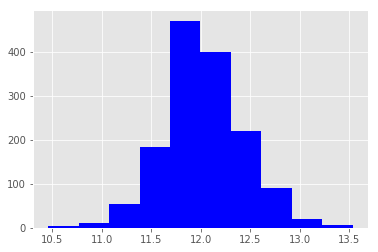

In [7]:
# log transform target variable and recalculate skewness

target = np.log(train.SalePrice)
print("Skew is:", target.skew())

plt.hist(target, color = 'blue')
plt.show()

We can visually see that the log-transformed data will more resemble a normal distribution.

In [8]:
# the .select_dtypes() method will return a subset of columns matching the specified data types
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [9]:
# examine correlation between features and target

corr = numeric_features.corr()

print("Features most positively correlated with SalePrice:")
print(corr["SalePrice"].sort_values(ascending = False)[1:6], "\n")

print("Features most negatively correlated with SalePrice:")
print(corr["SalePrice"].sort_values(ascending = False)[-5:])

Features most positively correlated with SalePrice:
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64 

Features most negatively correlated with SalePrice:
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [10]:
# dig deeper into OverallQual
# OverallQual: rates overall material and finish of the house

train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [11]:
# create pivot table
quality_pivot = train.pivot_table(index="OverallQual", values = "SalePrice", aggfunc=np.median)
quality_pivot

OverallQual
1      50150
2      60000
3      86250
4     108000
5     133000
6     160000
7     200141
8     269750
9     345000
10    432390
Name: SalePrice, dtype: int64

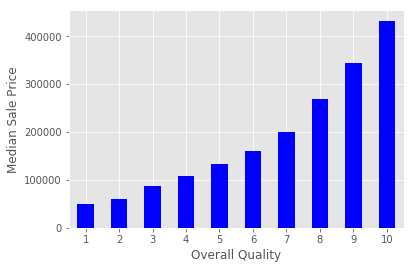

In [12]:
quality_pivot.plot(kind = 'bar', color = 'blue')
plt.xlabel("Overall Quality")
plt.ylabel("Median Sale Price")
plt.xticks(rotation = 0)
plt.show()

Notice that the median sales price strictly increases as Overall Quality increases.

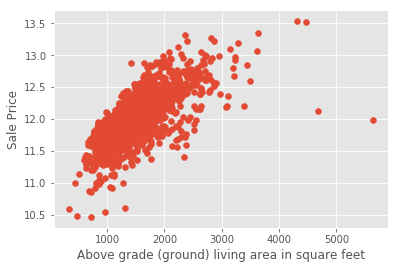

In [13]:
# visualize relationship between GrLivArea (ground living area) and SalePrice
plt.scatter(x = train["GrLivArea"], y = target)
plt.ylabel("Sale Price")
plt.xlabel("Above grade (ground) living area in square feet")
plt.show()

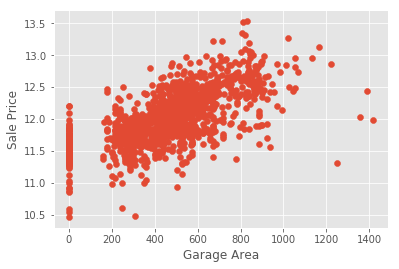

In [14]:
plt.scatter(x = train['GarageArea'], y = target)
plt.ylabel("Sale Price")
plt.xlabel("Garage Area")
plt.show()

In [15]:
# create new df with some outliers removed

train = train[train['GarageArea'] < 12000]

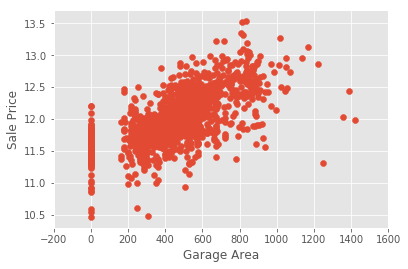

In [16]:
# same scatter plot as above
plt.scatter(x = train['GarageArea'], y = target)
plt.xlim(-200, 1600) # forces same scale as before
plt.ylabel("Sale Price")
plt.xlabel("Garage Area")
plt.show()

### Handling Null Values

In [17]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending = False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = "Feature"
nulls

,Null Count
Feature,
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageCond,81
GarageType,81
GarageYrBlt,81


In [18]:
train.MiscFeature.unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

### Wrangling the non-numeric features

In [19]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


### Transforming and engineering features

In [20]:
print("Original: \n")
print(train.Street.value_counts(), "\n")

Original: 

Pave    1454
Grvl       6
Name: Street, dtype: int64 



In [21]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first= True)

In [22]:
print("Encoded: \n")
print(train.enc_street.value_counts())

Encoded: 

1    1454
0       6
Name: enc_street, dtype: int64


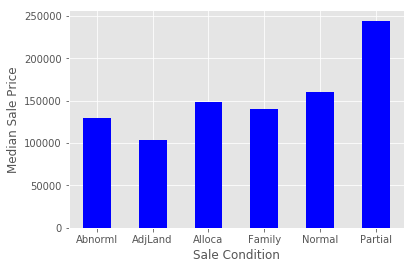

In [23]:
condition_pivot = train.pivot_table(index = 'SaleCondition', values="SalePrice", aggfunc=np.median)
condition_pivot.plot(kind = "bar", color = "blue")
plt.xlabel("Sale Condition")
plt.ylabel("Median Sale Price")
plt.xticks(rotation = 0)
plt.show()

Notice that **Partial** has a significantly higher Median Sale Price than the others. We will encode this as a new feature. We select all of the houses where SaleCondition is equal to Partial and assign the value 1, otherwise assign 0

In [24]:
def encode(x): return 1 if x == "Partial" else 0

train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

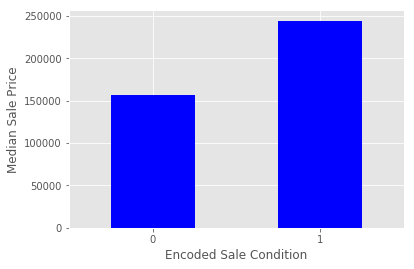

In [25]:
# explore this new feature as a plot

condition_pivot = train.pivot_table(index = "enc_condition", values = "SalePrice", aggfunc = np.median)
condition_pivot.plot(kind="bar", color = "blue")
plt.xlabel("Encoded Sale Condition")
plt.ylabel("Median Sale Price")
plt.xticks(rotation = 0)
plt.show()

In [26]:
# deal with missing data
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

# check to see if all columns have 0 null values

sum(data.isnull().sum() != 0)

0

## Step 3: Build a linear model

In [27]:
# sepearate features and target variable for modeling
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis = 1)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state = 42, test_size = 0.33)

### Begin modelling

In [29]:
# instantiate model
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [30]:
# fit model
model = lr.fit(X_train, y_train)

### Evaluate the performance and visualize results

In [31]:
# the model.score() method returns the r-squared value by default

print("R^2 is:", model.score(X_test, y_test))

R^2 is: 0.864746341058


This means that our features explain approximately 89% of the variance in our target variable

In [32]:
# explore RMSE

predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error
print("RMSE is:", mean_squared_error(y_test, predictions))

# RMSE measures the distance between our predicted values and actual values

RMSE is: 0.0230514681919


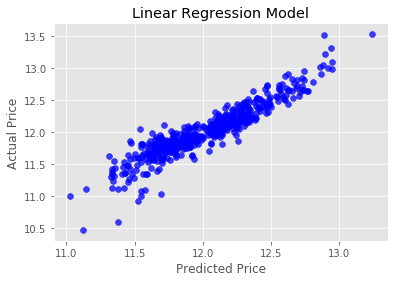

In [33]:
# we can view this relationship graphically with a scatter plot

actual_values = y_test
plt.scatter(predictions, actual_values, alpha = 0.75, color = 'b') # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel("Actual Price")
plt.title('Linear Regression Model')
plt.show()

# if predicted values were idential to actual values, graph wouyld be the straight line, y = x

### Try to improve the model

We'll try using **Ridge Regularization** to decrease the influence of less important features. Ridge regularization is a process which shrinks the regression coefficients of less important features.

We'll once again instantiate the model. The Ridge Regularization model takes a parameter, alpha, which controls the strength of the regularization.

We'll experiment by looping through a few different values of **alpha**, and see how this changes our results

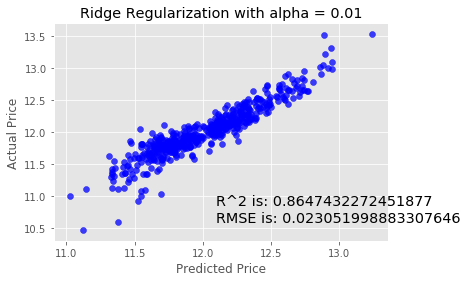

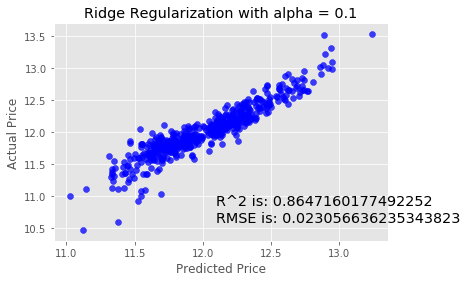

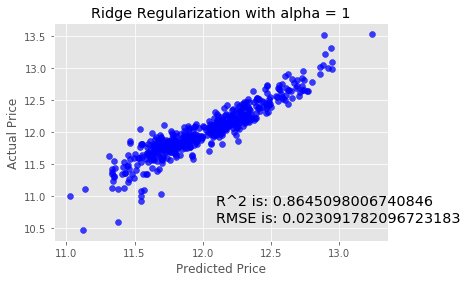

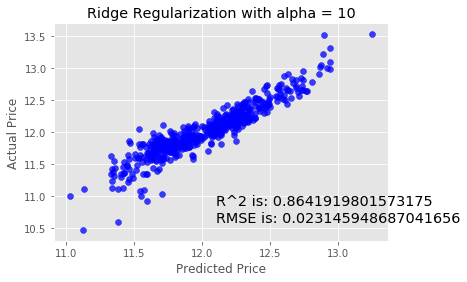

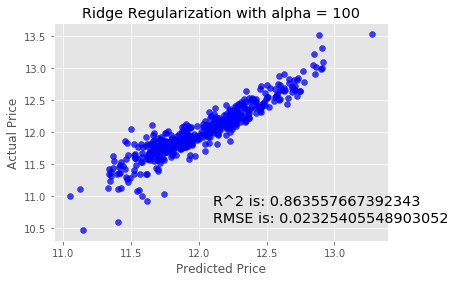

In [34]:
for i in range(-2, 3):
    alpha = 10 ** i
    rm = linear_model.Ridge(alpha = alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha = 0.75, color = 'b')
    plt.xlabel("Predicted Price")
    plt.ylabel("Actual Price")
    plt.title("Ridge Regularization with alpha = {}".format(alpha))
    overlay = "R^2 is: {} \nRMSE is: {}".format(ridge_model.score(X_test, y_test), mean_squared_error(y_test, preds_ridge))
    plt.annotate(s = overlay, xy = (12.1, 10.6), size = "x-large")
    plt.show()

These models perform almost identically to the first model. In our case, adjusting the alpha did not substantially improve our model. As you add more features, regularization can be helpful. Repeat this step after you've added more features

## Step 4: Make a submission

Need to create a csv file that contains the predicted SalePrice for each observation in the test.csv dataset.

In [35]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [36]:
# select features from the test data for the model as we did above
feats = test.select_dtypes(include = [np.number]).drop(['Id'], axis = 1).interpolate()

In [38]:
# next, we generate our predictions
predictions = model.predict(feats)

In [39]:
# now we'll transform the predictions to the correct form
# to reverse log() we do exp()
# so we apply np.exp() to our predictions since we took the logarithm previously

final_predictions = np.exp(predictions)

In [40]:
# look at the difference

print("Original predictions are: \n", predictions[:5],"\n")
print("Final predictions are: \n", final_predictions[:5])

Original predictions are: 
 [ 11.68856268  11.71858472  12.03237122  12.18181274  12.10677502] 

Final predictions are: 
 [ 119200.5537467   122833.45845102  168109.56584158  195206.40091533
  181094.63485686]


In [41]:
# let's assing these predictions and check that everything looks good

submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,119200.553747
1,1462,122833.458451
2,1463,168109.565842
3,1464,195206.400915
4,1465,181094.634857


In [42]:
# export to .csv file
# pass index = False b/c otherwise Pandas would create a new index for us

submission.to_csv("submission1.csv", index = False)

# Next steps

You can extend this tutorial and improve your results by:
* working iwth and transforming other features in the training set
* experimenting with different modeling techniques, such as Random Forest Regressors or Gradient Boosting
* Using ensembling models
* We created a set of categorical features called ```categoricals``` that were not all included in the final model. Go back adn try to include these features. There are other methods that might help with categorical data, notably the ```pd.get_dummies()``` method. After working on these features, repeat the transformations for the test data and make another submission